In [128]:
import matplotlib.pyplot as plt
from generate_plots import convert_tb_data

In [164]:
def generate_plot(df, col_name, title=None, filter_outliers=False, rolling_mean=False):
    df_filtered = df[df.name == col_name].reset_index(drop=True)
    # Filter outliers:
    if filter_outliers:
        df_filtered = df_filtered[df_filtered.value <= df_filtered.iloc[:10].max().value * 2]
    if rolling_mean:
        df_filtered.value = df_filtered.value.rolling(100).median()
    fig, ax = plt.subplots(1,1)
    df_filtered[['value']].plot(ax=ax)
    ax.set_title(title)
    ax.set(xlabel="Episodes")
    ax.legend().remove()
    ax.set_ylim([0, 0.3 * 1e9])
    ax.grid()
    fig.set_size_inches(7, 3.5)
    return fig

In [168]:
def format_plot(session_id, run_id):
    FILE_PATH = f"../models/experiment_runs/session{session_id}_run{run_id}/logs"
    df = convert_tb_data(FILE_PATH)
    fig = generate_plot(df, "losses/q_loss", title=f"Session {session_id} - Run {run_id}: Q-Loss", filter_outliers=False, rolling_mean=True)
    fig.savefig(f"./plots/session_{session_id}_run_{run_id}_q_loss")
    return df

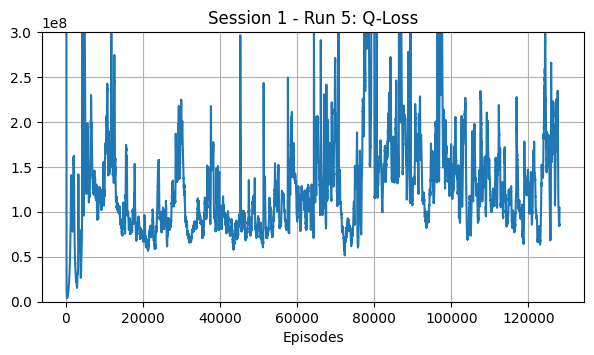

In [169]:
df = format_plot(1, 5)

In [162]:
session_id = 1
run_id = 5
FILE_PATH = f"../models/experiment_runs/session{session_id}_run{run_id}/logs"
df = convert_tb_data(FILE_PATH)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\cb\ETH\2023 FS\Semester Project\MAAC-auto-gov\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\cb\AppData\Local\Temp\ipykernel_14528\451042766.py", line 4, in <module>
    df = convert_tb_data(FILE_PATH)
  File "C:\cb\ETH\2023 FS\Semester Project\MAAC-auto-gov\analysis\generate_plots.py", line 53, in convert_tb_data
    all_df = pd.concat(out)[columns_order]
  File "C:\cb\ETH\2023 FS\Semester Project\MAAC-auto-gov\analysis\generate_plots.py", line 33, in convert_tfevent
  File "C:\cb\ETH\2023 FS\Semester Project\MAAC-auto-gov\analysis\generate_plots.py", line 33, in <listcomp>
  File "C:\cb\ETH\2023 FS\Semester Project\MAAC-auto-gov\venv\lib\site-packages\tensorflow\python\summary\summary_iterator.py", line 33, in __next__
    r = next(self._tf_record_iterator)
KeyboardInterrupt

During handling of the above exception, another exception oc

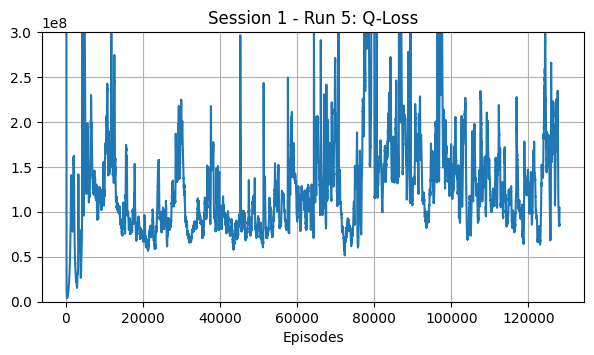

In [165]:
fig = generate_plot(df, "losses/q_loss", title=f"Session {session_id} - Run {run_id}: Q-Loss", filter_outliers=False, rolling_mean=True)